# PARTE DE RAFAEL

# <span style="color:lightblue"> Preparando o Dataset para a Análise</span>


In [29]:
# Importando as bibliotecas necessárias para realizar a análise dos dados categóricos
import pandas as pd
import matplotlib.pyplot as plt

# Importando o arquivo "liver_cirrhosis_v1.csv", que será o utilizado na análise
df_cirrose = pd.read_csv("..\data\dados_processados\liver_cirrhosis_v1.csv")

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_63224\2431731760.py:6: SyntaxWarning: invalid escape sequence '\d'
  df_cirrose = pd.read_csv("..\data\dados_processados\liver_cirrhosis_v1.csv")


In [16]:
# Exibindo o dataframe já importado
display(df_cirrose.head())

,Numero_dias,Situação,Droga,Idade,Sexo,Ascite,Hepatomegalia,Telangiectasia,Edema,Bilirrubina(mg/dl),Colesterol(mg/dl),Albumina(gm/dl),Cobre_Urina(ug/dia),Fosfatase_Alcalina (U/L),Aspartato_Aminotransferase(U/L),Triglicerídeos(mg/dl),Plaquetas(ml/1000),Tempo_de_Protrombina(s),Estágio
0,2221,Sobreviveu,Placebo,18499,F,N,S,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,Sobreviveu,Placebo,19724,M,S,N,S,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,Sobreviveu,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,Morte,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,Morte,Placebo,21699,F,N,S,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


# <span style="color:lightblue"> Realizando a Análise Exploratória dos Dados Categóricos</span>

### Análise 01: Quantidade Homens e Mulheres por Estágio da Doença

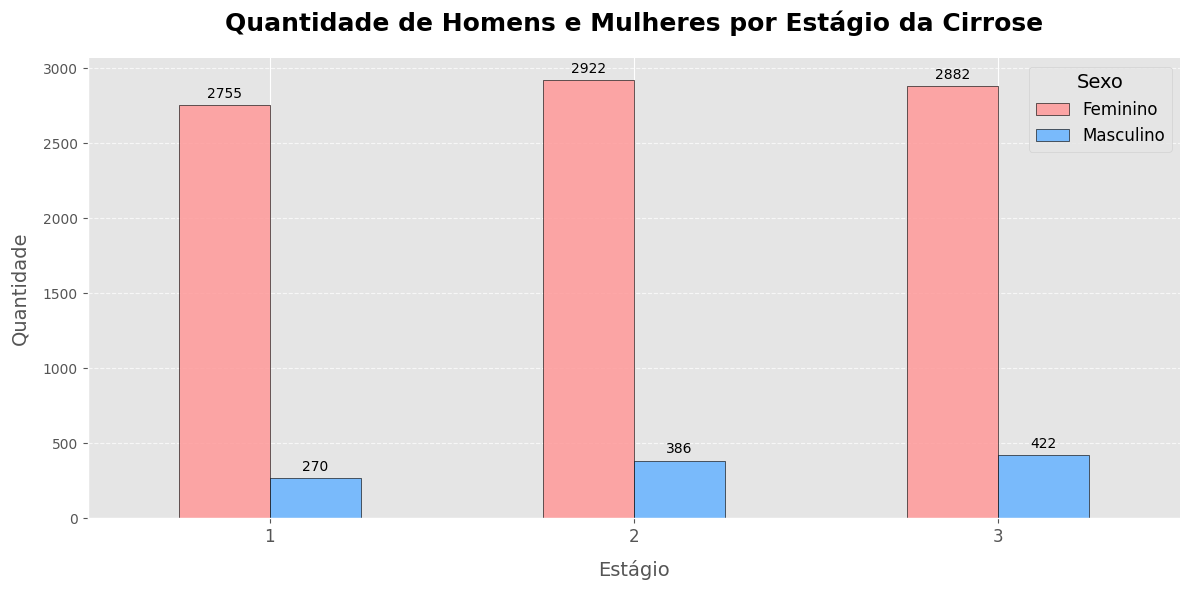

In [59]:
# Agrupando os dados e contando a quantidade de homens e mulheres por estágio utilizando groupby
grouped_data = df_cirrose.groupby(['Estágio', 'Sexo']).size().unstack()

# Estilzando o gráfico
plt.style.use('ggplot')
colors = ['#ff9999', '#66b3ff']
ax = grouped_data.plot(kind='bar', figsize=(12, 6), color=colors, edgecolor='black', alpha=0.85)

# Adicionando títulos e rótulos
plt.title('Quantidade de Homens e Mulheres por Estágio da Cirrose', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Estágio', fontsize=14, labelpad=10)
plt.ylabel('Quantidade', fontsize=14, labelpad=10)

# Adicionando rótulos de dados em cima de cada barra
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

# Ajustando a legenda
plt.legend(title='Sexo', labels=['Feminino', 'Masculino'], fontsize=12, title_fontsize=14)

# Melhorando eixos x e y
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12)

# Removendo as bordas do gráfico (por motivos estéticos)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


#### Conclusões da Análise 01:
* Com esse gráfico de barras agrupados, é perceptível que o grupo das mulheres é abrangentemente mais afetado em todas os estágio da doença, enquanto que os homens estão em minoria, com o grupo das mulheres sendo uma média de 10x maior que os homens, com uma diferença média de 90% entre os dois grupos em todos os estágios da doença.


* Também podemos perceber que o número de pessoas de ambas as classes vai aumentando com o passar do nível do estágio da cirrose, o que indica que a doença tende a ser bem progressiva e dificilmente um paciente é curado já no primeiro estágio




### Análise 02: Quantidade de Sobreviventes/Transplantados e mortos por sexo (Masculino e Feminino)

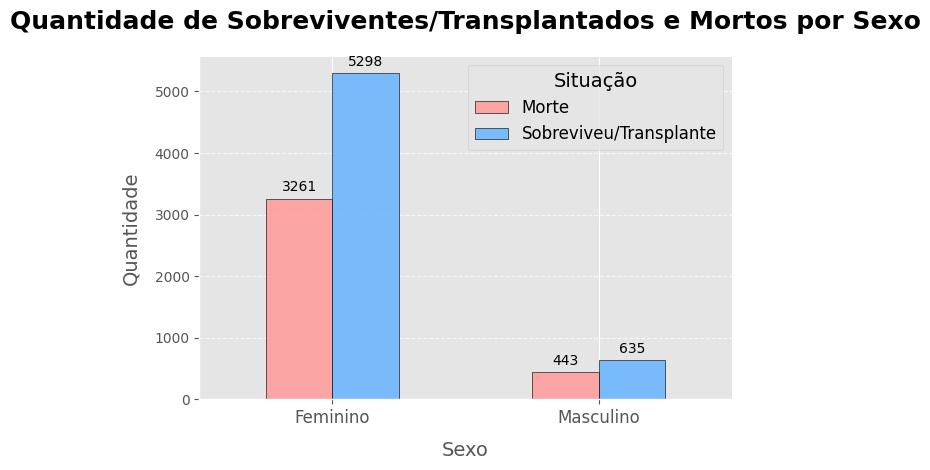

In [64]:
# Considerando o valor de "Transplante" como "Sobreviveu"
df_cirrose['Situação'] = df_cirrose['Situação'].replace('Transplante', 'Sobreviveu')

# Contando sobreviventes/transplantados e mortos por sexo
contagem = df_cirrose.groupby(['Sexo', 'Situação']).size().unstack()

# Estilizando o gráfico
plt.style.use('ggplot')
colors = ['#ff9999', '#66b3ff']
ax = contagem.plot(kind='bar', stacked=False, color=colors, edgecolor='black', alpha=0.85)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Definindo os rótulos dos eixos, o título do gráfico e a legenda
plt.xlabel('Sexo', fontsize=14, labelpad=10)
plt.ylabel('Quantidade', fontsize=14, labelpad=10)
plt.title('Quantidade de Sobreviventes/Transplantados e Mortos por Sexo', fontsize=18, fontweight='bold', pad=20)
legend_labels = ['Morte', 'Sobreviveu/Transplante']
plt.legend(legend_labels, fontsize=12, title='Situação', title_fontsize=14)
ax.set_xticklabels(['Feminino', 'Masculino'], rotation=0, ha='center', fontsize=12)

# Adicionando rótulos de dados em cima de cada barra
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

# Removendo bordas do gráfico por uma questão estética
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


#### Conclusões da Análise 02:
* Analisando o gráfico a primeira vista, talvez pensamos que o grupo feminino tem muito mais óbitos que o masculino. Quantitativamente pode até ser, mas proporcionalmente falando a relação que homens e mulheres que sobrevivem a cirrose é praticamente a mesma:
    * No grupo feminino, o número de sobreviventes em relação aos falecidos tem uma diferença de aproximadamente 38%;
    * Já no grupo masculino, essa diferença é de 30%


* Por isso, concluimos que pelos dados fornecidos, inevitavelmente mais mulheres tenderão a sobreviver nos tratamentos, porém proporcionalmente falando, essa diferença entre sobreviventes ou que receberam transplantes e entre os que vieram a óbito é praticamente a mesma coisa em ambos os sexos

### Análise 03: Distribuição de Sobreviventes e Óbitos por Estágio da Cirrose

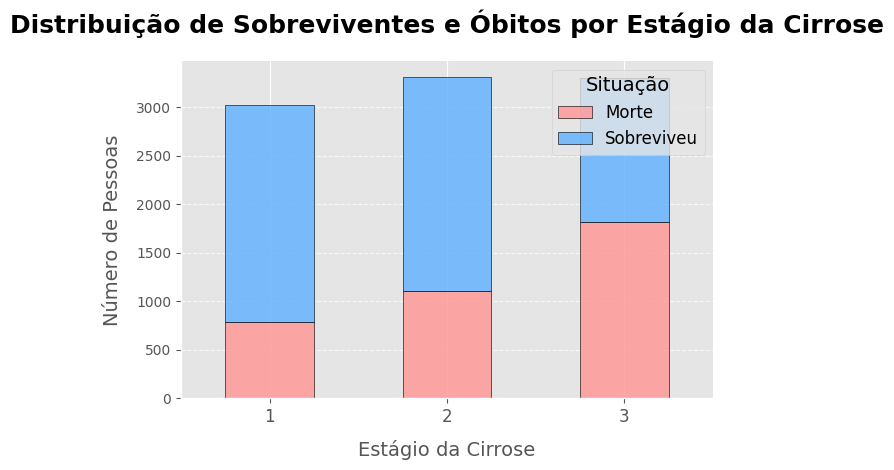

In [58]:
# Filtrando o DataFrame para ignorar as entradas com "Transplante"
df_filtrado = df_cirrose[df_cirrose['Situação'] != 'Transplante']

# Contando o número de ocorrências de cada combinação de estágio e situação
contagem = df_filtrado.groupby(['Estágio', 'Situação']).size().unstack()

# Definindo um estilo mais sofisticado
plt.style.use('ggplot')

# Definindo uma paleta de cores moderna
colors = ['#ff9999', '#66b3ff']

# Plotando o gráfico de barras empilhadas com cores personalizadas
ax = contagem.plot(kind='bar', stacked=True, color=colors, edgecolor='black', alpha=0.85)

# Definindo os rótulos dos eixos e o título do gráfico
plt.xlabel('Estágio da Cirrose', fontsize=14, labelpad=10)
plt.ylabel('Número de Pessoas', fontsize=14, labelpad=10)
plt.title('Distribuição de Sobreviventes e Óbitos por Estágio da Cirrose', fontsize=18, fontweight='bold', pad=20)

# Ajustando a legenda
legend_labels = ['Morte', 'Sobreviveu']
plt.legend(legend_labels, fontsize=12, title='Situação', title_fontsize=14)

# Adicionando linhas de grade
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Melhorando a estética do eixo X
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12)

# Removendo bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mostrando o gráfico
plt.tight_layout()
plt.show()


#### Conclusões da Análise 03:
* Nessa terceira análise, percebemos que conforme os estágios da cirrose vão progredindo, mais sucetíveis as pessoas ficam de não sobreviver. Enquanto nos estágios inicias da doença, todos tem mais chance de continuarem vivos.
* Desse modo, concluímos que os tratamentos da cirrose não tendem a ser tão efetivos nos estágios mais avançados e que o quanto antes for tratado, melhor para o paciente. 

# PARTE DE GABI

### Análise 04: ...